In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import openpyxl
import seaborn as sns
import matplotlib.pyplot as plt

## 1. KOSDAQ 5개년 ROE 지수 확인

In [2]:
df_kosdaq = pd.read_excel("C:\\Users\\easya\\Workspace\\HK_Project\\data\\KOSDAQROE5years.xlsx")
df_kosdaq.head()

,종목명,2017,2018,2019,2020,2021
0,엑세스바이오,-12.8,-10.4,-56.8,89.2,107.2
1,아이패밀리에스씨,-20.3,17.7,NaN,84.8,23.0
2,SGC이테크건설,11.7,13.1,6.7,79.7,33.5
3,오스템임플란트,9.3,11.5,-17.2,78.8,44.4
4,휴림로봇,9.2,-76.0,-34.7,78.8,-72.0


In [3]:
# 결측치 확인
df_kosdaq.isna().sum()

종목명      0
2017    33
2018    23
2019    11
2020     2
2021     3
dtype: int64

In [4]:
# 빈칸 nan값으로 변환 후 제거
df_kosdaq.replace('', np.nan)
df_kosdaq.dropna(inplace=True)
df_kosdaq.head()

,종목명,2017,2018,2019,2020,2021
0,엑세스바이오,-12.8,-10.4,-56.8,89.2,107.2
2,SGC이테크건설,11.7,13.1,6.7,79.7,33.5
3,오스템임플란트,9.3,11.5,-17.2,78.8,44.4
4,휴림로봇,9.2,-76.0,-34.7,78.8,-72.0
5,씨앤투스성진,-24.3,-69.6,-3.7,75.7,41.9


In [5]:
df_kosdaq.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 176 entries, 0 to 226
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   종목명     176 non-null    object 
 1   2017    176 non-null    float64
 2   2018    176 non-null    float64
 3   2019    176 non-null    float64
 4   2020    176 non-null    float64
 5   2021    176 non-null    float64
dtypes: float64(5), object(1)
memory usage: 9.6+ KB


In [6]:
# ROE 11이상 
df_kosdaq_ROE_11_upper = df_kosdaq[(df_kosdaq[2017] >= 11) & (df_kosdaq[2018] >= 11) & (df_kosdaq[2019] >= 11) & (df_kosdaq[2020] >= 11) & (df_kosdaq[2021] >= 11)]
df_kosdaq_ROE_11_upper.head()

,종목명,2017,2018,2019,2020,2021
21,디알젬,31.7,21.0,17.9,47.0,20.7
25,노바텍,31.7,29.2,16.4,44.1,44.6
32,고려신용정보,21.1,25.6,31.8,39.8,32.3
41,에이치피오,19.4,23.9,24.7,35.6,16.5
51,에이피티씨,60.8,45.2,25.1,31.3,51.1


In [7]:
# '평균' 열 추가
df_kosdaq_ROE_11_upper["average"] = df_kosdaq_ROE_11_upper.mean(axis=1)
df_kosdaq_ROE_11_upper.head()

,종목명,2017,2018,2019,2020,2021,average
21,디알젬,31.7,21.0,17.9,47.0,20.7,27.66
25,노바텍,31.7,29.2,16.4,44.1,44.6,33.20
32,고려신용정보,21.1,25.6,31.8,39.8,32.3,30.12
41,에이치피오,19.4,23.9,24.7,35.6,16.5,24.02
51,에이피티씨,60.8,45.2,25.1,31.3,51.1,42.70


- 시각화

In [8]:
import matplotlib.font_manager as fm

font_list = [font.name for font in fm.fontManager.ttflist]
font_list[:5]

['STIXSizeFourSym',
 'STIXSizeOneSym',
 'cmsy10',
 'DejaVu Serif Display',
 'STIXNonUnicode']

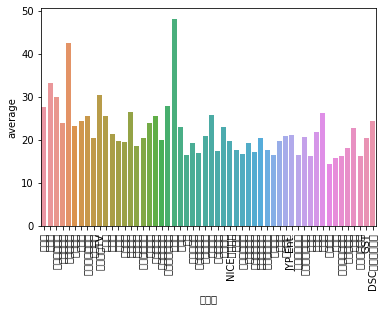

In [9]:
sns.barplot(
    data = df_kosdaq_ROE_11_upper,
    x = "종목명",
    y = "average"
)
plt.rcParams['font.family'] = 'cmsy10'
plt.rcParams['font.size'] = 7
plt.xticks(rotation=90)
plt.show()

## 2. df_code와 병합

In [10]:
df_code = pd.read_excel("C:\\Users\\easya\\Workspace\\HK_Project\\data\\KOSDAQ0305.xlsx")
df_code.head(3)

,종목명,종목코드,시가총액,매출액,현금흐름,PER,ROE,ROA,PBR,PSR,PCR,자산총계,부채총계,자본총계,주당순이익
0,셀트리온헬스케어,91990,104821,16276,-226.1,63.77,13.36,7.30,5.22,6.440219,-463.604600,37397,18068,19329,1060
1,엘앤에프,66970,71013,3561,452.7,-181.01,-9.39,-3.40,9.04,19.941870,156.865474,4662,2686,1976,-1127
2,펄어비스,263750,67281,4888,1574.3,130.26,16.45,11.43,8.68,13.764525,42.737090,8972,2603,6369,780


In [11]:
df_code = df_code[["종목명", "종목코드"]]
df_code

,종목명,종목코드
0,셀트리온헬스케어,91990
1,엘앤에프,66970
2,펄어비스,263750
3,카카오게임즈,293490
4,위메이드,112040
...,...,...
1429,제이웨이,58420
1430,신영스팩5호,323280
1431,에스디시스템,121890
1432,IBKS제12호스팩,335870


In [12]:
df_code.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1434 entries, 0 to 1433
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   종목명     1434 non-null   object
 1   종목코드    1434 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 22.5+ KB


In [13]:
# data type 확인
df_code = df_code.astype({"종목코드":"string"})
df_code.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1434 entries, 0 to 1433
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   종목명     1434 non-null   object
 1   종목코드    1434 non-null   string
dtypes: object(1), string(1)
memory usage: 22.5+ KB


- 종목코드 형식에 맞추어 변경 : 6자리

In [14]:
for i in range(7):
    df_code["종목코드"] = df_code["종목코드"].str.zfill(i)
df_code.head()

,종목명,종목코드
0,셀트리온헬스케어,091990
1,엘앤에프,066970
2,펄어비스,263750
3,카카오게임즈,293490
4,위메이드,112040


- df_kosdaq_ROE_11_upper 데이터 프레임과 df_code 병합

In [17]:
df_code_merge = pd.merge(df_code, df_kosdaq_ROE_11_upper, how='outer', on='종목명')
df_code_merge

,종목명,종목코드,2017,2018,2019,2020,2021,average
0,셀트리온헬스케어,091990,NaN,NaN,NaN,NaN,NaN,NaN
1,엘앤에프,066970,NaN,NaN,NaN,NaN,NaN,NaN
2,펄어비스,263750,NaN,NaN,NaN,NaN,NaN,NaN
3,카카오게임즈,293490,NaN,NaN,NaN,NaN,NaN,NaN
4,위메이드,112040,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
1429,제이웨이,058420,NaN,NaN,NaN,NaN,NaN,NaN
1430,신영스팩5호,323280,NaN,NaN,NaN,NaN,NaN,NaN
1431,에스디시스템,121890,NaN,NaN,NaN,NaN,NaN,NaN
1432,IBKS제12호스팩,335870,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
# NaN 값 삭제
df_code_merge.dropna(inplace=True)
df_code_merge.head(5)

,종목명,종목코드,2017,2018,2019,2020,2021,average
10,리노공업,058470,18.8,19.8,18.8,17.4,30.0,20.96
17,동진쎄미켐,005290,19.7,16.9,17.8,21.6,20.8,19.36
20,JYP Ent.,035900,21.4,22.5,21.9,17.3,22.5,21.12
22,아프리카TV,067160,23.2,26.6,32.5,27.6,42.6,30.50
34,티씨케이,064760,28.8,28.4,23.2,24.7,27.7,26.56


In [19]:
df_ROE_11_upper = df_code_merge.copy()

In [20]:
# excel 파일로 변환
df_ROE_11_upper.to_excel("kosdaq_ROE_11_upper.xlsx")

## 중간 진행과정 정리
1. ROE 15 이상 기업 추출
2. ROE 5개년 꾸준히 11이상 나온 안정성 있는 기업 추출
3. 2단계에서 추출된 종목의 갯수로 보아, 각 종목에 해당하는 산업은 개별적으로 검색을 통해 기재하기로 함

In [57]:
df = pd.read_excel('C:\\Users\\easya\\Workspace\\HK_Project\\data\\kosdaq_ROE_11_upper.xlsx')
df.head(2)

,Unnamed: 0,종목명,종목코드,2017,2018,2019,2020,2021,average,산업,WICS
0,10,리노공업,58470,18.8,19.8,18.8,17.4,30.0,20.96,반도체,반도체와반도체장비
1,17,동진쎄미켐,5290,19.7,16.9,17.8,21.6,20.8,19.36,반도체,반도체와반도체장비


In [58]:
# 필요없는 컬럼 제거
df.drop(columns=["Unnamed: 0"], inplace=True)
df.head()

,종목명,종목코드,2017,2018,2019,2020,2021,average,산업,WICS
0,리노공업,58470,18.8,19.8,18.8,17.4,30.0,20.96,반도체,반도체와반도체장비
1,동진쎄미켐,5290,19.7,16.9,17.8,21.6,20.8,19.36,반도체,반도체와반도체장비
2,JYP Ent.,35900,21.4,22.5,21.9,17.3,22.5,21.12,"오락,문화",NaN
3,아프리카TV,67160,23.2,26.6,32.5,27.6,42.6,30.50,소프트웨어,NaN
4,티씨케이,64760,28.8,28.4,23.2,24.7,27.7,26.56,반도체,반도체와반도체장비


In [59]:
# data type 변경
df = df.astype({"종목코드":"string"})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   종목명      54 non-null     object 
 1   종목코드     54 non-null     string 
 2   2017     54 non-null     float64
 3   2018     54 non-null     float64
 4   2019     54 non-null     float64
 5   2020     54 non-null     float64
 6   2021     54 non-null     float64
 7   average  54 non-null     float64
 8   산업       54 non-null     object 
 9   WICS     25 non-null     object 
dtypes: float64(6), object(3), string(1)
memory usage: 4.3+ KB


- 종목코드가 6자리에 해당이 (6 - 기재된 코드의 길이)만큼 앞자리에 0을 추가

In [61]:
for i in range(7):
    df["종목코드"] = df["종목코드"].str.zfill(i)
df.head(3)

,종목명,종목코드,2017,2018,2019,2020,2021,average,산업,WICS
0,리노공업,058470,18.8,19.8,18.8,17.4,30.0,20.96,반도체,반도체와반도체장비
1,동진쎄미켐,005290,19.7,16.9,17.8,21.6,20.8,19.36,반도체,반도체와반도체장비
2,JYP Ent.,035900,21.4,22.5,21.9,17.3,22.5,21.12,"오락,문화",NaN


In [62]:
df1 = df.copy()

In [64]:
# '산업' 종류 확인
df1["산업"].unique()

array(['반도체', '오락,문화', '소프트웨어', '기타서비스', '제약', '디지털컨텐츠', '의료,정밀기기', '소매',
       '도매', '섬유,의류', '기계,장비', '일반전기전자', '환경', '기타제조', '종합건설', '음식료,담배',
       '사업지원', '전문기술', '금융', '인터넷', '화학', 'IT부품', '연구,개발', '교육',
       '출판,매체복제'], dtype=object)

In [65]:
# '산업'의 종류별 갯수 확인
df1["산업"].value_counts()

반도체        13
제약          3
음식료,담배      3
의료,정밀기기     3
사업지원        3
디지털컨텐츠      2
기타서비스       2
전문기술        2
일반전기전자      2
화학          2
인터넷         2
금융          2
소프트웨어       2
도매          2
교육          1
연구,개발       1
IT부품        1
환경          1
종합건설        1
기타제조        1
오락,문화       1
기계,장비       1
섬유,의류       1
소매          1
출판,매체복제     1
Name: 산업, dtype: int64

- 해당 산업의 종목 중, ROE 5개년 11 이상인 종목이 3개 이상인 산업의 데이터 확인

In [66]:
df1[df1["산업"] == "사업지원"]

,종목명,종목코드,2017,2018,2019,2020,2021,average,산업,WICS
29,한국기업평가,034950,17.7,18.5,21.0,19.9,23.0,20.02,사업지원,상업서비스와공급품
47,나이스디앤비,130580,17.8,22.2,21.2,18.4,22.9,20.50,사업지원,상업서비스와공급품
49,고려신용정보,049720,21.1,25.6,31.8,39.8,32.3,30.12,사업지원,상업서비스와공급품


In [67]:
df1[df1["산업"] == "의료,정밀기기"]

,종목명,종목코드,2017,2018,2019,2020,2021,average,산업,WICS
10,파크시스템스,140860,16.0,16.8,21.1,20.4,11.0,17.06,"의료,정밀기기",전자장비와기기
46,제노레이,122310,26.5,27.4,25.3,16.1,19.7,23.00,"의료,정밀기기",건강관리장비와물품
50,디알젬,263690,31.7,21.0,17.9,47.0,20.7,27.66,"의료,정밀기기",건강관리장비와물품


In [68]:
df1[df1["산업"] == "음식료,담배"]

,종목명,종목코드,2017,2018,2019,2020,2021,average,산업,WICS
27,노바렉스,194700,16.8,14.5,17.2,24.3,19.9,18.54,"음식료,담배",제약
38,에이치피오,357230,19.4,23.9,24.7,35.6,16.5,24.02,"음식료,담배",식품
52,에스앤디,260970,20.1,17.0,20.7,24.7,14.7,19.44,"음식료,담배",식품


In [69]:
df1[df1["산업"] == "제약"]

,종목명,종목코드,2017,2018,2019,2020,2021,average,산업,WICS
6,콜마비앤에이치,200130,30.9,25.9,23.8,27.9,19.9,25.68,제약,제약
11,엘앤씨바이오,290650,28.0,15.0,13.1,18.6,11.0,17.14,제약,건강관리장비와물품
16,휴온스,243070,32.4,31.6,21.4,25.7,16.8,25.58,제약,제약


In [70]:
df1[df1["산업"] == "반도체"]

,종목명,종목코드,2017,2018,2019,2020,2021,average,산업,WICS
0,리노공업,058470,18.8,19.8,18.8,17.4,30.0,20.96,반도체,반도체와반도체장비
1,동진쎄미켐,005290,19.7,16.9,17.8,21.6,20.8,19.36,반도체,반도체와반도체장비
4,티씨케이,064760,28.8,28.4,23.2,24.7,27.7,26.56,반도체,반도체와반도체장비
7,덕산네오룩스,213420,14.5,14.3,12.7,18.9,23.4,16.76,반도체,디스플레이장비와부품
8,하나머티리얼즈,166090,30.6,35.3,20.9,22.8,29.5,27.82,반도체,반도체와반도체장비
14,테스나,131970,14.3,21.9,17.5,19.2,15.2,17.62,반도체,반도체와반도체장비
15,코미코,183300,34.4,36.0,21.0,16.1,24.3,26.36,반도체,반도체와반도체장비
18,에프에스티,036810,14.0,19.4,17.5,15.3,25.1,18.26,반도체,반도체와반도체장비
22,월덱스,101160,13.9,28.2,24.2,22.0,27.3,23.12,반도체,반도체와반도체장비
28,유니셈,036200,29.8,22.7,18.6,15.3,27.3,22.74,반도체,반도체와반도체장비
